# Preparing the Google - Isolated Sign Language Recognition Dataset

**Author: James Bustos**

---

* The Google - Isolated Sign Language Recognition dataset is organized into sequenced data, facilitating the training of our Long Short-Term Memory (LSTM) model. Given the dataset's structured format, the preparation process focuses on optimizing this data for LSTM model training:

  * **Understanding the Dataset Structure**: The dataset contains sequenced landmarks for sign language gestures, with each row indicating a landmark position in (x, y, z) coordinates across video frames. This structure is essential for preprocessing and training.
  * **Preprocessing the Data:** The preparation involves several key steps:
    - **Data Consistency:** Ensure each data sequence is complete and accurate.
    - **Normalization:** Adjust the x, y, and z coordinates to a uniform range suitable for LSTM input.
    - **Creating the TensorFlow Dataset** Constructing a TensorFlow dataset suitable for training a model on the sign language recognition data.
    - **Data Augmentation (Optional):** Apply augmentation techniques to improve model robustness and generalization.



## Download dataset

> To adjust for Colabs limited disk space I reduced the dataset for testing/learning purposes.






In [1]:
!wget -O asl-signs.zip "https://dl.dropboxusercontent.com/scl/fi/fj6lzw4ftkixg17mc86t2/asl-signs.zip?rlkey=26s7nawa7mwpt2i0gjanixnmp&dl=1"
!unzip -q asl-signs.zip

--2024-03-30 21:59:04--  https://dl.dropboxusercontent.com/scl/fi/fj6lzw4ftkixg17mc86t2/asl-signs.zip?rlkey=26s7nawa7mwpt2i0gjanixnmp&dl=1
Resolving dl.dropboxusercontent.com (dl.dropboxusercontent.com)... 162.125.64.15, 2620:100:6018:15::a27d:30f
Connecting to dl.dropboxusercontent.com (dl.dropboxusercontent.com)|162.125.64.15|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 871848618 (831M) [application/zip]
Saving to: ‘asl-signs.zip’

asl-signs.zip       100%[===================>] 831.46M  22.5MB/s    in 34s     

2024-03-30 21:59:39 (24.6 MB/s) - ‘asl-signs.zip’ saved [871848618/871848618]



## **Data Walkthrough**

### Import Libraries and Set Directories

### Import Libraries
* We import three essential libraries for data manipulation and visualization:
  - **pandas**: Used for data manipulation and analysis. It provides data structures and operations for manipulating numerical tables and time series, making it ideal for working with structured data.
  - **numpy**: A library for numerical computing in Python. It offers comprehensive mathematical functions, random number generators, linear algebra routines, Fourier transforms, and more.
  - **matplotlib**: A plotting library for creating static, interactive, and animated visualizations in Python. It's used here for data visualization purposes, allowing us to graph our data and insights effectively.
  - **pyarrow.parquet**: A library to efficiently read and write parquet files, a columnar storage file format optimized for performance in data analysis workflows. This is particularly important for working with the landmark data stored in parquet format.

### Set File Directories

- `LANDMARK_FILES_DIR`: This directory contains the landmark files (.parquet) extracted from sign language videos. Each file, corresponding to a unique sign sequence, stores frame-by-frame landmark data, including positions (x, y, z) for various facial and hand landmarks.
- `TRAIN_FILE`: The path to the `train.csv` file, which serves as an index for our dataset. It lists the paths to individual landmark files within `LANDMARK_FILES_DIR`, alongside their associated `participant_id`, `sequence_id`, and the `sign` label indicating the gesture performed.



In [2]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pyarrow.parquet as pq

# set files directories
LANDMARK_FILES_DIR = "/content/asl-signs/train_landmark_files"
TRAIN_FILE = "/content/asl-signs/train.csv"

### Inspect Data

In this section, our goal is to familiarize ourselves with the structure and content of our dataset by loading and inspecting the initial entries from both `train.csv` and a sample parquet file.

### Inspect `train.csv`
First, we'll load the `train.csv` file using pandas and display the first five rows. This file contains the metadata for our dataset, including the paths to the parquet files that store the actual sign language sequence data, along with the corresponding sign labels.

```python
# Load the train.csv file
dataframe = pd.read_csv(TRAIN_FILE)

# Display the first five entries
dataframe.head()
```

This step gives us insight into how the dataset is organized and how we can access the individual sign language sequences stored in parquet files.

### Inspect a Sample Parquet File
Next, we'll load a sample parquet file to examine the detailed frame-by-frame landmark data. Each parquet file corresponds to a sign language sequence, containing landmarks for each frame of the video. We'll use the `pyarrow.parquet` library to read a parquet file and then display the first five entries.

```python
# Sample parquet file path (example)
sample_parquet_path = LANDMARK_FILES_DIR + '/26734/1000035562.parquet'

# Load the sample parquet file
sample_parquet_df = pq.read_table(sample_parquet_path).to_pandas()

# Display the first five entries
sample_parquet_df.head()
```

Inspecting a sample parquet file allows us to understand the granularity and format of the landmark data, including the coordinates (x, y, z) for each landmark across different frames.


In [3]:
# Load the train.csv file
dataframe = pd.read_csv(TRAIN_FILE)

# Display the first five entries
dataframe.head()

,path,participant_id,sequence_id,sign
0,train_landmark_files/26734/1000035562.parquet,26734,1000035562,blow
1,train_landmark_files/28656/1000106739.parquet,28656,1000106739,wait
2,train_landmark_files/16069/100015657.parquet,16069,100015657,cloud
3,train_landmark_files/25571/1000210073.parquet,25571,1000210073,bird
4,train_landmark_files/62590/1000240708.parquet,62590,1000240708,owie


In [4]:
# Sample parquet file path (example)
sample_parquet_path = LANDMARK_FILES_DIR + '/26734/1000035562.parquet'

# Load the sample parquet file
sample_parquet_df = pq.read_table(sample_parquet_path).to_pandas()

# Display the first five entries
sample_parquet_df.head()


,frame,row_id,type,landmark_index,x,y,z
0,20,20-face-0,face,0,0.494400,0.380470,-0.030626
1,20,20-face-1,face,1,0.496017,0.350735,-0.057565
2,20,20-face-2,face,2,0.500818,0.359343,-0.030283
3,20,20-face-3,face,3,0.489788,0.321780,-0.040622
4,20,20-face-4,face,4,0.495304,0.341821,-0.061152


### Visualize Data

* This visualization helps us better understand the data and identify patterns. It's important to note that this step is for understanding, not part of model training.

* **Sources**: [Animated Data Visualization
](https://www.kaggle.com/code/danielpeshkov/animated-data-visualization)

In [5]:
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

train = pd.read_csv(TRAIN_FILE)
dir = '/content/asl-signs'

## Change this directory to any file
path_to_sign = 'train_landmark_files/26734/1000035562.parquet'
sign = pd.read_parquet(f'{dir}/{path_to_sign}')
sign.y = sign.y * -1

In [6]:
def get_hand_points(hand):
    x = [[hand.iloc[0].x, hand.iloc[1].x, hand.iloc[2].x, hand.iloc[3].x, hand.iloc[4].x], # Thumb
         [hand.iloc[5].x, hand.iloc[6].x, hand.iloc[7].x, hand.iloc[8].x], # Index
         [hand.iloc[9].x, hand.iloc[10].x, hand.iloc[11].x, hand.iloc[12].x],
         [hand.iloc[13].x, hand.iloc[14].x, hand.iloc[15].x, hand.iloc[16].x],
         [hand.iloc[17].x, hand.iloc[18].x, hand.iloc[19].x, hand.iloc[20].x],
         [hand.iloc[0].x, hand.iloc[5].x, hand.iloc[9].x, hand.iloc[13].x, hand.iloc[17].x, hand.iloc[0].x]]

    y = [[hand.iloc[0].y, hand.iloc[1].y, hand.iloc[2].y, hand.iloc[3].y, hand.iloc[4].y],  #Thumb
         [hand.iloc[5].y, hand.iloc[6].y, hand.iloc[7].y, hand.iloc[8].y], # Index
         [hand.iloc[9].y, hand.iloc[10].y, hand.iloc[11].y, hand.iloc[12].y],
         [hand.iloc[13].y, hand.iloc[14].y, hand.iloc[15].y, hand.iloc[16].y],
         [hand.iloc[17].y, hand.iloc[18].y, hand.iloc[19].y, hand.iloc[20].y],
         [hand.iloc[0].y, hand.iloc[5].y, hand.iloc[9].y, hand.iloc[13].y, hand.iloc[17].y, hand.iloc[0].y]]
    return x, y

def get_pose_points(pose):
    x = [[pose.iloc[8].x, pose.iloc[6].x, pose.iloc[5].x, pose.iloc[4].x, pose.iloc[0].x, pose.iloc[1].x, pose.iloc[2].x, pose.iloc[3].x, pose.iloc[7].x],
         [pose.iloc[10].x, pose.iloc[9].x],
         [pose.iloc[22].x, pose.iloc[16].x, pose.iloc[20].x, pose.iloc[18].x, pose.iloc[16].x, pose.iloc[14].x, pose.iloc[12].x,
          pose.iloc[11].x, pose.iloc[13].x, pose.iloc[15].x, pose.iloc[17].x, pose.iloc[19].x, pose.iloc[15].x, pose.iloc[21].x],
         [pose.iloc[12].x, pose.iloc[24].x, pose.iloc[26].x, pose.iloc[28].x, pose.iloc[30].x, pose.iloc[32].x, pose.iloc[28].x],
         [pose.iloc[11].x, pose.iloc[23].x, pose.iloc[25].x, pose.iloc[27].x, pose.iloc[29].x, pose.iloc[31].x, pose.iloc[27].x],
         [pose.iloc[24].x, pose.iloc[23].x]
        ]

    y = [[pose.iloc[8].y, pose.iloc[6].y, pose.iloc[5].y, pose.iloc[4].y, pose.iloc[0].y, pose.iloc[1].y, pose.iloc[2].y, pose.iloc[3].y, pose.iloc[7].y],
         [pose.iloc[10].y, pose.iloc[9].y],
         [pose.iloc[22].y, pose.iloc[16].y, pose.iloc[20].y, pose.iloc[18].y, pose.iloc[16].y, pose.iloc[14].y, pose.iloc[12].y,
          pose.iloc[11].y, pose.iloc[13].y, pose.iloc[15].y, pose.iloc[17].y, pose.iloc[19].y, pose.iloc[15].y, pose.iloc[21].y],
         [pose.iloc[12].y, pose.iloc[24].y, pose.iloc[26].y, pose.iloc[28].y, pose.iloc[30].y, pose.iloc[32].y, pose.iloc[28].y],
         [pose.iloc[11].y, pose.iloc[23].y, pose.iloc[25].y, pose.iloc[27].y, pose.iloc[29].y, pose.iloc[31].y, pose.iloc[27].y],
         [pose.iloc[24].y, pose.iloc[23].y]
        ]
    return x, y

The sign being shown here is: blow


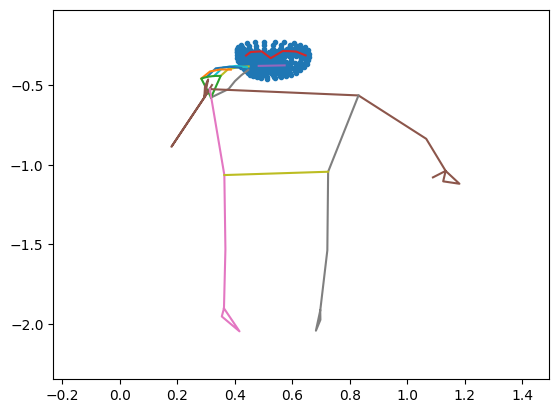

In [7]:
def animation_frame(f):
    frame = sign[sign.frame==f]
    left = frame[frame.type=='left_hand']
    right = frame[frame.type=='right_hand']
    pose = frame[frame.type=='pose']
    face = frame[frame.type=='face'][['x', 'y']].values
    lx, ly = get_hand_points(left)
    rx, ry = get_hand_points(right)
    px, py = get_pose_points(pose)
    ax.clear()
    ax.plot(face[:,0], face[:,1], '.')
    for i in range(len(lx)):
        ax.plot(lx[i], ly[i])
    for i in range(len(rx)):
        ax.plot(rx[i], ry[i])
    for i in range(len(px)):
        ax.plot(px[i], py[i])
    plt.xlim(xmin, xmax)
    plt.ylim(ymin, ymax)

print(f"The sign being shown here is: {train[train.path==f'{path_to_sign}'].sign.values[0]}")

## These values set the limits on the graph to stabilize the video
xmin = sign.x.min() - 0.2
xmax = sign.x.max() + 0.2
ymin = sign.y.min() - 0.2
ymax = sign.y.max() + 0.2

fig, ax = plt.subplots()
l, = ax.plot([], [])
animation = FuncAnimation(fig, func=animation_frame, frames=sign.frame.unique())

HTML(animation.to_html5_video())

## **Creating the TensorFlow Dataset**



### Why Use TensorFlow Datasets?

1. **Handling Large Datasets**: TFDS can manage datasets that are too large to fit into memory. It does this by loading data in chunks (batches), enabling the model to train on large datasets without memory overflow issues.

2. **Performance Optimization**: TFDS includes features like prefetching, parallel data extraction, and caching, which significantly speed up data loading and preprocessing. This means less waiting time for data to be ready for each training step, leading to faster model training.

3. **Flexibility and Scalability**: TensorFlow datasets provide a flexible pipeline for transforming data, allowing for complex data augmentation and preprocessing operations to be efficiently integrated into the training pipeline.

4. **Integration with TensorFlow Ecosystem**: TFDS seamlessly integrates with TensorFlow's training loops and model APIs, making it easier to use alongside TensorFlow models, optimizers, and other utilities.


> [Video Tutorial](https://www.youtube.com/watch?v=VFEOskzhhbc)



### Overview

In this section, we begin the process of constructing a TensorFlow dataset suitable for training a model on the sign language recognition data. This involves a series of steps designed to format the data properly, including loading, preprocessing, batching, and combining features with labels. We will go over the following:

- **Importing Libraries**: Load necessary libraries for data handling and manipulation.

- **Load Sign Label Mappings**: Read the JSON file that maps sign gestures to prediction indices, essential for label processing.

- **Defining Constants**: Define constants such as data columns (x, y, z coordinates), number of rows per frame, and batch size.

- **Data Loading and Preprocessing Functions**: Implement functions to load data from parquet files, focusing on required columns, and reshape it to match model input specifications.

- **Generating the Dataset**:
  - Initialize a dataset.
  - Use helper functions to turn our data into the format our model can learn from.
  - Group the data into batches, getting it ready for the model.

- **Getting Labels Ready**:
  - Turn the sign names into numbers the model understands.
  - Group these numbers into batches, just like we did with the data.

- **Putting It All Together**:
  - Join the data and labels into one dataset that we can use to train the model.

### Import libraries

Let's import the necessary libraries for creating our TensorFlow dataset. Here's a brief overview of each and its relevance to our project:

- **TensorFlow (`tf`)**: A powerful library for numerical computation and machine learning. In this context, TensorFlow is used to construct and manipulate datasets, and it's the backbone of building and training our model.

- **JSON**: We use the JSON library to load mapping files that associate sign language gestures with numerical indices, a step required for label encoding.



In [8]:
# import libraries
import tensorflow as tf
import json
import pandas as pd
import numpy as np

### Load Sign Label Mappings

In this step, we load the mappings between sign language gestures and their corresponding numerical indices from a JSON file. This mapping is essential for transforming textual labels into numerical form, which is a format our machine learning model can work with more effectively.

```
with open('/content/asl-signs/sign_to_prediction_index_map.json') as f:
    sign_index_mapping = json.load(f)
print(sign_index_mapping)
```

By loading this mapping, we can easily convert the sign language labels in our dataset into indices that our TensorFlow model will predict. This is required for both training our model and interpreting its predictions.

In [9]:
with open('/content/asl-signs/sign_to_prediction_index_map.json') as f:
    sign_index_mapping = json.load(f)

print(sign_index_mapping)

{'bird': 0, 'blow': 1, 'cloud': 2, 'owie': 3, 'wait': 4}


### Defining Constants

Next, we focus on defining constants that will guide the handling and processing of our dataset for the TensorFlow model. Understanding the significance of each constant will help in grasping their impact on the data preparation and training process:

- **`COLUMNS_OF_INTEREST`**: These are the columns we extract from our dataset, specifically the 'x', 'y', and 'z' coordinates. These coordinates represent the spatial positioning of sign language gestures and are features for our model to learn the nuances of sign language.

- **`TOTAL_LANDMARKS` = 543**: This constant signifies the total number of landmark points captured for each frame in our video sequences. The value 543 is derived from the structure of our dataset, where each frame includes a comprehensive set of landmarks across the face, hands, and pose. These landmarks provide a detailed snapshot of a gesture at a given time, crucial for our model to understand and learn from the temporal progression of signs.

- **`SHARDS_NUMBER` = 2**: Sharding refers to splitting the dataset into smaller, more manageable segments. Here, we divide our dataset into two parts. This technique can optimize data processing and loading times, making it easier to handle large volumes of data.

- **`SAVE_LOCATION` = '/content/ASLDataset'**: This is the directory where our processed data and any output from our model will be saved.

- **`BATCHING_SIZE` = 256**: Batch size determines how many examples our model processes before updating its internal parameters. A batch size of 256 strikes a balance between training speed and model performance, allowing for efficient computation without sacrificing the ability to generalize from the training data.

This process ensure that our dataset is treated consistently throughout our workflow, from how we extract and handle features to how we structure our training batches.

In [10]:
COLUMNS_OF_INTEREST    = ['x', 'y', 'z']
TOTAL_LANDMARKS  = 543
SHARDS_NUMBER      = 2
SAVE_LOCATION       = '/content/ASLDataset'
BATCHING_SIZE      = 256

### Data Loading and Preprocessing Function

In this section, we're setting up functions to load and process our data, making it ready for the model. Here’s a breakdown:

- **Loading Data with `load_data_from_file`**:
   - This function takes a path to a parquet file.
   - It reads the file, selecting only the 'x', 'y', and 'z' columns.
   - It calculates the number of frames in the video by dividing the total rows by rows per frame.
   - The data is converted to `float32`, a format TensorFlow likes.
   - Finally, it reshapes the data so each piece matches what the model expects: a sequence of frames, each with its landmarks.

- **Fetching Features with `transform_tensor_to_data`**:
   - This function wraps around the first one but is designed to work within TensorFlow’s way of handling data.
   - It takes a tensor (basically, TensorFlow’s version of an array), grabs the actual file path from it, and feeds that to our data loading function.
   - This ensures TensorFlow can use our data loading function without any issues.

- **Setting Data Shape with `ensure_data_shape`**:
   - TensorFlow works best when it knows the shape of the data it’s dealing with.
   - This function tells TensorFlow the shape of our data: a batch of frames, where each frame has a set number of landmarks, and each landmark has three coordinates (x, y, z).
   - The ‘None’ in the shape means it can handle any number of frames, making it flexible.

These steps are essential for turning our raw data into something structured and ready for the model to learn from.

In [11]:
def load_data_from_file(pq_path):
    data = pd.read_parquet('/content/asl-signs/'+pq_path, columns=COLUMNS_OF_INTEREST)
    n_frames = int(len(data) / TOTAL_LANDMARKS)
    data = data.values.astype(np.float32)
    return data.reshape(n_frames, TOTAL_LANDMARKS, len(COLUMNS_OF_INTEREST))

#### Understanding the shape

When we used the `load_data_from_file` function on a sample parquet file, it processed the file and reshaped the data. Here's what happened:

  - The first number, **105**, represents the total number of frames in this particular video sequence. Each frame is a snapshot in time of the sign being performed.
  - The second number, **543**, is the number of landmarks (or points) captured in each frame. This consistent number aligns with the constant `TOTAL_LANDMARKS` we defined earlier, indicating each frame has a detailed set of landmarks.
  - The third number, **3**, corresponds to the coordinates of each landmark: 'x', 'y', and 'z'.

This shape (105, 543, 3) tells us that we have a sequence of 105 frames, and in each frame, there are 543 landmarks, with each landmark defined by 3 coordinates. This structured format is exactly what we need for training our model, allowing it to learn the dynamic movements of sign language from spatial landmark data over time.

In [12]:
# Lets view one sample parquet file and use our helper function
test_np = load_data_from_file('train_landmark_files/16069/100015657.parquet')
test_np.shape

(105, 543, 3)

#### Fetching Features with transform_tensor_to_data

In the `transform_tensor_to_data` function, we work on integrating our preprocessing routine within TensorFlow's data pipeline. Here's a breakdown:

- **Bridge to Custom Processing**: This function acts as a connector, allowing TensorFlow to utilize our custom `load_data_from_file` function directly within its data processing pipeline. It's designed to work with TensorFlow's tensors, enabling full compatibility.

- **Use of `tf.py_function`**: The core of this integration is `tf.py_function`, which wraps our `feat_wrapper` function. This TensorFlow operation allows us to run Python functions as part of the TensorFlow graph. It's particularly useful for incorporating non-TensorFlow Python code (like our data loading function) into TensorFlow's execution environment.

- **Data Conversion and Decoding**:
  - Inside `feat_wrapper`, the tensor `ftensor` is first converted to a numpy array with `.numpy()` and then decoded from bytes to a string with `.decode('utf-8')`. This conversion is necessary because the file paths in our dataset are stored as strings in TensorFlow tensors, but they need to be in a format that our file loading function can use.
  - This process bridges the gap between TensorFlow's tensor operations and the Python-based file handling required to load our dataset.

- **Ensuring Data Type Compatibility**: The `Tout=tf.float32` argument in `tf.py_function` specifies the output type of the function, ensuring that the data returned by our loading function is in `float32` format. This consistency is crucial for TensorFlow models, which typically expect inputs to be in floating-point format for numerical stability and efficiency during training.

This is the integration of custom data with TensorFlow's optimized data pipelines.

In [13]:
def transform_tensor_to_data(ftensor):
    def feat_wrapper(ftensor):
        return load_data_from_file(ftensor.numpy().decode('utf-8'))
    return tf.py_function(
        feat_wrapper,
        [ftensor],
        Tout=tf.float32
    )

The `ensure_data_shape` function ensures our data adheres to the expected shape before it's fed into the model for training. Here's what it does and why it's important:

- **Setting Expectations**: This function uses `tf.ensure_shape` to specify the shape that our data should have. By doing this, it helps TensorFlow understand how to handle the incoming data during the model training process.

- **Flexible Batching**: The first dimension is set to `None`, which allows for flexibility in the batch size. This means the function can handle any number of examples in a batch, making our data pipeline more adaptable.

- **Consistent Structure**: The second and third dimensions are explicitly set to match the `TOTAL_LANDMARKS` and the length of `COLUMNS_OF_INTEREST`, respectively. This ensures that every piece of data fed into the model has a consistent and expected structure, specifically, the number of landmarks per frame and the coordinates (x, y, z) for each landmark.

- **Ensuring Compatibility**: By explicitly setting the shape, we help prevent errors that might arise from data shape mismatches. It's a way of telling the model, "This is exactly what you should expect," which is crucial for smooth training.

This function ensures consistency in our data and structures it for training a machine learning model.

In [14]:
def ensure_data_shape(x):
    return tf.ensure_shape(x, (None, TOTAL_LANDMARKS, len(COLUMNS_OF_INTEREST)))

### Generating the Dataset

This part of the process turns the parquet file paths from our train.csv into a TensorFlow dataset that's formatted and batched, ready for model training. The steps are as follows:

1. **Initialize Dataset with File Paths**: We start by creating a dataset from the file paths listed in our CSV. These paths point to the parquet files, each containing a sequence of sign language data.

2. **Load and Preprocess the Data**: For every file path in our dataset, we use the helper functions we created to load the corresponding data and preprocess it, focusing on the necessary 'x', 'y', and 'z' coordinates.

3. **Batch the Data**: After processing, the data is grouped into batches. This step is crucial for training, as it dictates the amount of data the model processes in one iteration.

```python
dataframe = pd.read_csv('/content/asl-signs/train.csv')

features_dataset = tf.data.Dataset.from_tensor_slices(
    dataframe.path.values  # Dataset from parquet paths
).map(
    transform_tensor_to_data,  # Load and preprocess data
    num_parallel_calls=tf.data.AUTOTUNE  # Optimize preprocessing
).map(
    ensure_data_shape,  # Ensure correct data shape
    num_parallel_calls=tf.data.AUTOTUNE  # Optimize shaping
).ragged_batch(
    BATCHING_SIZE  # Group into batches
)
```

- `tf.data.Dataset.from_tensor_slices` creates a dataset of the file paths.
- `.map(transform_tensor_to_data, num_parallel_calls=tf.data.AUTOTUNE)` applies the custom function to load and preprocess the data efficiently, with `AUTOTUNE` dynamically adjusting parallelism for optimal performance.
- `.map(ensure_data_shape, num_parallel_calls=tf.data.AUTOTUNE)` ensures each item has the desired shape, again using `AUTOTUNE` for performance optimization.
- `ragged_batch` groups the data into batches, preparing it for the model. This approach is efficient for handling data where each sequence might have a different number of frames, fitting the dynamic nature of sign language videos.


In [15]:
dataframe = pd.read_csv('/content/asl-signs/train.csv')

features_dataset = tf.data.Dataset.from_tensor_slices(
    dataframe.path.values  # Dataset from parquet paths
).map(
    transform_tensor_to_data,  # Load and preprocess data
    num_parallel_calls=tf.data.AUTOTUNE  # Optimize preprocessing
).map(
    ensure_data_shape,  # Ensure correct data shape
    num_parallel_calls=tf.data.AUTOTUNE  # Optimize shaping
).ragged_batch(
    BATCHING_SIZE  # Group into batches
)

### Getting Labels Ready

In this step, we prepare the labels for our model. This involves converting the sign language names into numerical indices and then batching these indices to align with our data batches. Here’s how it’s done:

1. **Convert Sign Names to Indices**: The model cannot understand textual labels, so we map each sign name to a unique numerical index. This mapping ensures the model can process and learn from the labels.

2. **Batch the Labels**: After conversion, we group the labels into batches. This batching aligns the labels with the corresponding data batches, ensuring each data batch has its matching set of labels during training.

Here's the code for preparing and batching the labels:

```python
# load and batch the labels
labels_dataset = tf.data.Dataset.from_tensor_slices(
    dataframe.sign.map(sign_index_mapping).values.reshape(-1,1)  # Convert sign names to indices
).batch(
    BATCHING_SIZE  # Group into batches
)
```

- We start by creating a dataset of labels from `dataframe.sign`, utilizing the `sign_index_mapping` dictionary to convert each sign name into its corresponding index.
- The `.map(sign_index_mapping)` function applies this conversion, effectively translating all textual labels into numerical form.
- Following the conversion, `.batch(BATCHING_SIZE)` is used to group these numerical labels into batches, mirroring the batch size of our data.

This process ensures our labels are in the right format and batched correctly, ready to be paired with the data batches for model training.

In [16]:
# load and batch the labels
labels_dataset = tf.data.Dataset.from_tensor_slices(
    dataframe.sign.map(sign_index_mapping).values.reshape(-1,1)  # Convert sign names to indices
).batch(
    BATCHING_SIZE  # Group into batches
)

### Putting It All Together and Saving

After preparing both the feature and label datasets, the final step is to combine them into a single dataset. This combined dataset is what we'll use for training our model. It ensures that each input data batch is paired with its corresponding label batch, aligning perfectly for the learning process.

Here’s how we put everything together and save it:

1. **Combine Features and Labels**: We use the `zip` function to pair each feature batch with its corresponding label batch. This creates a dataset where each element is a tuple containing a batch of features and a batch of labels.

2. **Prefetching for Performance**: Before saving, we apply `prefetch(tf.data.AUTOTUNE)` to the dataset. This step hints at TensorFlow to preload the next batch while the current one is being processed, improving training speed.

3. **Saving the Dataset**: We save the dataset using the `.save` method.

4. **Sharding the Dataset**: The `distribute_across_shards` defines how the dataset is split into shards or separate files. We use a simple uniform distribution to decide how data is assigned to shards.

Here’s the code snippet for these steps:

```python
# Combine the features and labels into one dataset
complete_dataset = tf.data.Dataset.zip((features_dataset, labels_dataset))

def distribute_across_shards(*_):
    return tf.random.uniform(shape=[], maxval=SHARDS_NUMBER, dtype=tf.int64)

# Prefetch and save the dataset
complete_dataset.prefetch(tf.data.AUTOTUNE).save(SAVE_LOCATION, shard_func=distribute_across_shards)
```

- `tf.data.Dataset.zip((features_dataset, labels_dataset))` combines the features and labels.
- `.prefetch(tf.data.AUTOTUNE)` ensures that the dataset is loaded efficiently, enhancing performance.
- `.save(SAVE_LOCATION, shard_func=distribute_across_shards)` stores the dataset, with `distribute_across_shards` determining how it’s divided into shards.


In [17]:
# Combine the features and labels into one dataset
complete_dataset = tf.data.Dataset.zip((features_dataset, labels_dataset))

def distribute_across_shards(*_):
    return tf.random.uniform(shape=[], maxval=SHARDS_NUMBER, dtype=tf.int64)

# Prefetch and save the dataset
complete_dataset.prefetch(tf.data.AUTOTUNE).save(SAVE_LOCATION, shard_func=distribute_across_shards)

# **SOLUTION**



In [18]:
# Necessary libraries
import tensorflow as tf
import pandas as pd
import numpy as np
import json

# Load sign to index mapping
with open('/content/asl-signs/sign_to_prediction_index_map.json') as file:
    sign_index_mapping = json.load(file)
print(sign_index_mapping)

# Constants setup
COLUMNS_OF_INTEREST = ['x', 'y', 'z']
TOTAL_LANDMARKS = 543
SHARDS_NUMBER = 2
SAVE_LOCATION = '/content/ASLDataset'
BATCHING_SIZE = 256

# Function to load and reshape data from a file
def load_data_from_file(file_path):
    data = pd.read_parquet('/content/asl-signs/' + file_path, columns=COLUMNS_OF_INTEREST)
    frames_count = int(len(data) / TOTAL_LANDMARKS)
    data_as_floats = data.values.astype(np.float32)
    return data_as_floats.reshape(frames_count, TOTAL_LANDMARKS, len(COLUMNS_OF_INTEREST))

# Function to transform tensor to data
def transform_tensor_to_data(tensor):
    def wrapper_function(tensor):
        return load_data_from_file(tensor.numpy().decode('utf-8'))
    return tf.py_function(wrapper_function, [tensor], Tout=tf.float32)

# Function to ensure data shape
def ensure_data_shape(data):
    return tf.ensure_shape(data, (None, TOTAL_LANDMARKS, len(COLUMNS_OF_INTEREST)))

# Load dataset from CSV
dataframe = pd.read_csv('/content/asl-signs/train.csv')

# Create TensorFlow datasets for features
features_dataset = tf.data.Dataset.from_tensor_slices(dataframe.path.values).map(
    transform_tensor_to_data, num_parallel_calls=tf.data.AUTOTUNE).map(
    ensure_data_shape, num_parallel_calls=tf.data.AUTOTUNE).ragged_batch(BATCHING_SIZE)

# Create TensorFlow datasets for labels
labels_dataset = tf.data.Dataset.from_tensor_slices(
    dataframe.sign.map(sign_index_mapping).values.reshape(-1,1)).batch(BATCHING_SIZE)

# Combine features and labels into one dataset
complete_dataset = tf.data.Dataset.zip((features_dataset, labels_dataset))

# Function to decide on shard distribution
def distribute_across_shards(*_):
    return tf.random.uniform(shape=[], maxval=SHARDS_NUMBER, dtype=tf.int64)

# Final step: prefetch and save the dataset for efficient training
complete_dataset.prefetch(tf.data.AUTOTUNE).save(SAVE_LOCATION, shard_func=distribute_across_shards)

{'bird': 0, 'blow': 1, 'cloud': 2, 'owie': 3, 'wait': 4}


In [19]:
# Determine the number of batches in the complete dataset
dataset_cardinality = complete_dataset.cardinality().numpy()
print(f"Dataset cardinality (number of batches): {dataset_cardinality}")


Dataset cardinality (number of batches): 8


In [20]:
# Download our TF Dataset
!zip -r ASLDataset.zip ASLDataset/

  adding: ASLDataset/ (stored 0%)
  adding: ASLDataset/9599301937257639596/ (stored 0%)
  adding: ASLDataset/9599301937257639596/00000001.shard/ (stored 0%)
  adding: ASLDataset/9599301937257639596/00000001.shard/00000000.snapshot (deflated 14%)
  adding: ASLDataset/9599301937257639596/00000000.shard/ (stored 0%)
  adding: ASLDataset/9599301937257639596/00000000.shard/00000000.snapshot (deflated 14%)
  adding: ASLDataset/snapshot.metadata (stored 0%)
  adding: ASLDataset/dataset_spec.pb (deflated 26%)
  adding: ASLDataset/10506842217049778974/ (stored 0%)
  adding: ASLDataset/10506842217049778974/00000001.shard/ (stored 0%)
  adding: ASLDataset/10506842217049778974/00000001.shard/00000000.snapshot (deflated 14%)
  adding: ASLDataset/10506842217049778974/00000000.shard/ (stored 0%)
  adding: ASLDataset/10506842217049778974/00000000.shard/00000000.snapshot (deflated 14%)
